# Types of graphs: Regression Plots

In [2]:
# import all modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [64]:
# load data
df = pd.read_csv('../datasets/clean/simpledf_applevalues.csv', index_col=0)
df.head()

,Br,Pt,Sp,UK
1961,19962.0,70000.0,385500.0,339000.0
1962,22600.0,58000.0,274500.0,583000.0
1963,23241.0,92000.0,480700.0,545000.0
1964,21158.0,85000.0,321600.0,653000.0
1965,40386.0,96000.0,446800.0,529000.0


<AxesSubplot:xlabel='Pt', ylabel='Sp'>

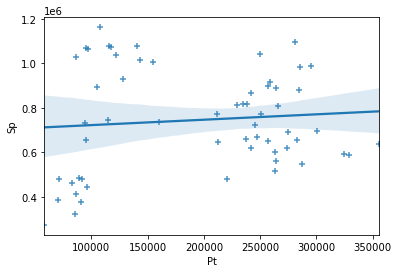

In [3]:
sns.regplot(data=df, x='Pt',
            y='Sp', marker='+')

The ***residual plot*** is a very useful plot for understanding the appropriateness of a regression model. 
Ideally, the residual values in the plot should be plotted randomly across the horizontal line.

<AxesSubplot:xlabel='Pt', ylabel='Sp'>

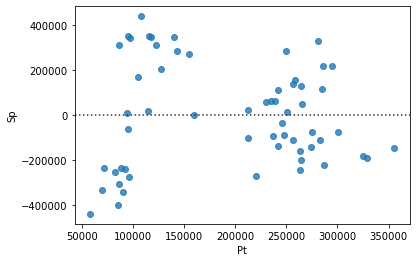

In [4]:
sns.residplot(data=df, x='Pt',
            y='Sp')

<AxesSubplot:xlabel='Pt', ylabel='Sp'>

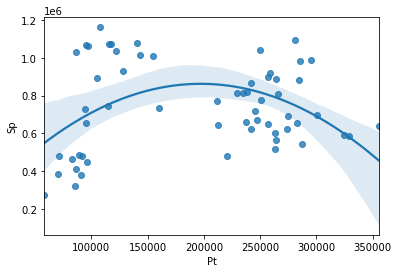

In [5]:
sns.regplot(data=df, x='Pt',
            y='Sp', order=2) # sns will use numpy to attempt a polynimial fit

<AxesSubplot:xlabel='Pt', ylabel='Sp'>

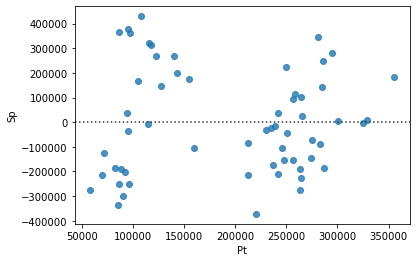

In [6]:
sns.residplot(data=df, x='Pt',
            y='Sp', order=2)

###  regression plots with categorical variables

In [13]:
# load and prepare data
df2 = pd.read_csv('../datasets/clean/cropresidues_europe.csv', index_col=0, 
                 usecols=['Area', 'Item', 'Element', 'average_1961-2019', 'std_1961-2019'])
element_map = {'Indirect emissions (N2O) (Crop residues)':1,
                   'Indirect emissions (CO2eq) (Crop residues)':2,
                    'Emissions (N2O) (Crop residues)':3,
                    'Emissions (CO2eq) (Crop residues)':4,
                        'Residues (Crop residues)':5}
df2.Element = df2.Element.map(element_map)
df2.head()

,Item,Element,average_1961-2019,std_1961-2019
Area,,,,
Afghanistan,Potatoes,1.0,2.360000e-03,1.189103e-03
Afghanistan,Potatoes,2.0,7.313050e-01,3.682238e-01
Afghanistan,Potatoes,3.0,1.285000e-02,6.465882e-03
Afghanistan,Potatoes,4.0,3.981562e+00,2.004742e+00
Afghanistan,"Rice, paddy",5.0,6.773198e+06,1.578952e+06


<AxesSubplot:xlabel='Element', ylabel='average_1961-2019'>

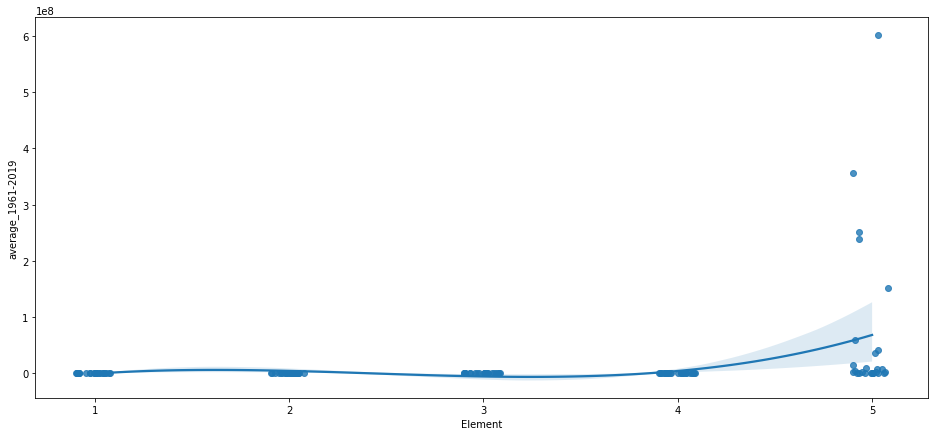

In [14]:
sns.regplot(data=df2[:200], x='Element', y='average_1961-2019', x_jitter=.1,
           order=3) #both x and y need to be the same type

In some cases, even with the jitter, it may be difficult to see if there are any trends based on the value of the variable. Using an *estimator for the x value* can provide another helpful view of the data. 

<AxesSubplot:xlabel='Element', ylabel='average_1961-2019'>

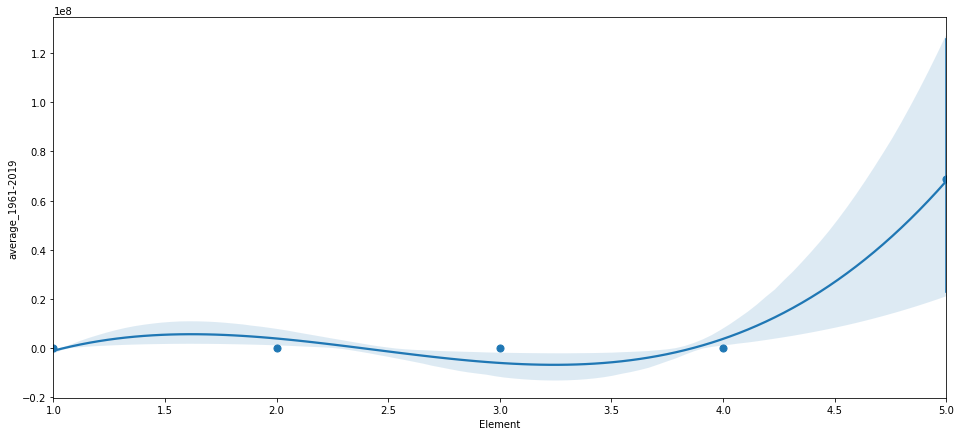

In [15]:
sns.regplot(data=df2[:200], x='Element', y='average_1961-2019',
            x_estimator=np.mean, x_jitter=0.1, order=3)

When there are **continuous variables**, it can be helpful to break them into different bins.

<AxesSubplot:xlabel='Element', ylabel='average_1961-2019'>

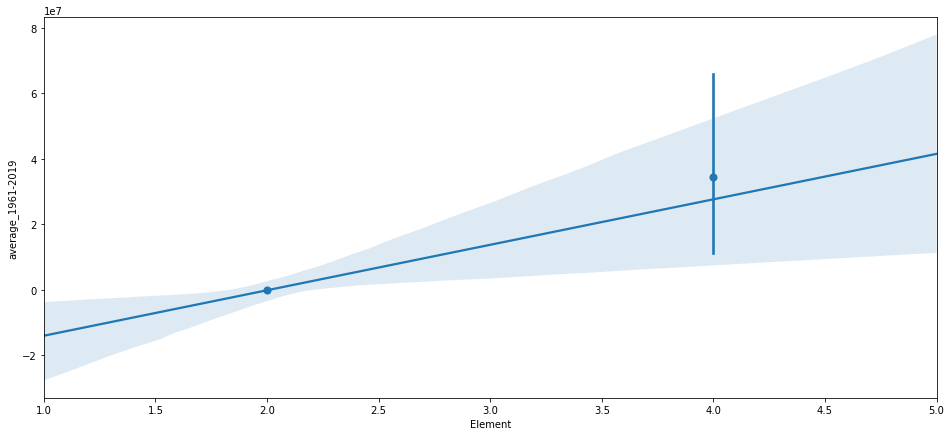

In [16]:
sns.regplot(data=df2[:200], x='Element', y='average_1961-2019', x_bins=2)

A heatmap is a common matrix plot that can be used to graphically summarize the relationship between two variables. 

In [18]:
df3 = df2.loc['European Union (28)']

In [19]:
df_crosstab = pd.crosstab(df3.Item, df3.Element, values=df3['average_1961-2019'], aggfunc='mean').round(0).astype(int)

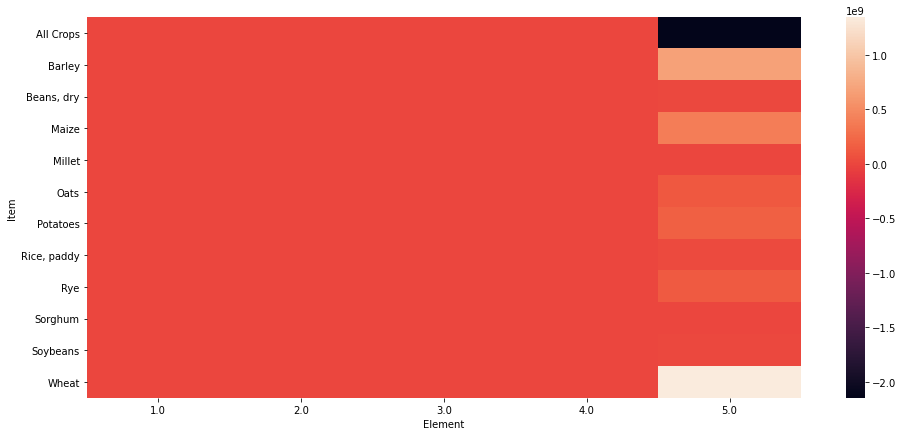

In [20]:
# Set default size for figures
plt.rcParams['figure.figsize'] = (16, 7)

sns.heatmap(df_crosstab)
plt.show()

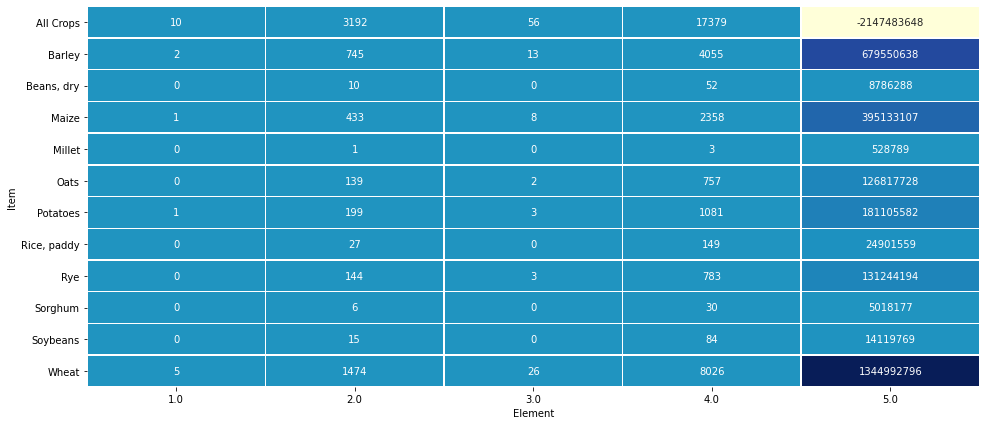

In [22]:
sns.heatmap(df_crosstab, annot=True, fmt="d",cmap="YlGnBu", cbar=False, linewidths=.5)
plt.show()

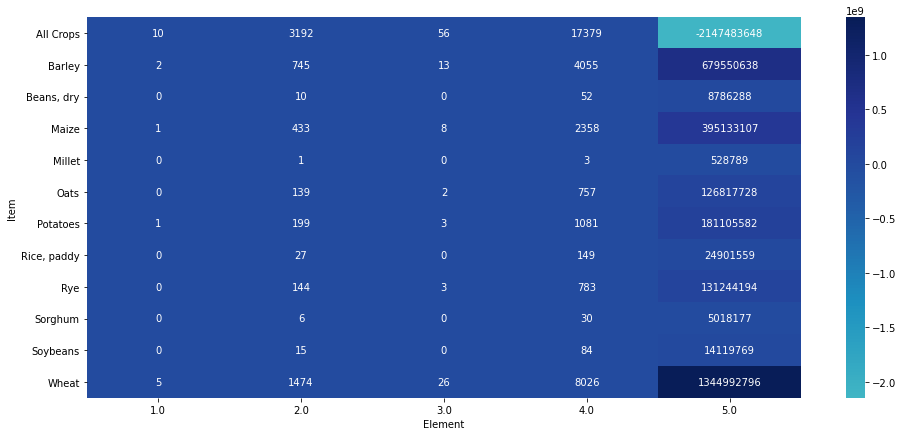

In [41]:
sns.heatmap(df_crosstab, annot=True, fmt="d",cmap="YlGnBu", cbar=True, center=df_crosstab.iloc[0, 4])
plt.show()

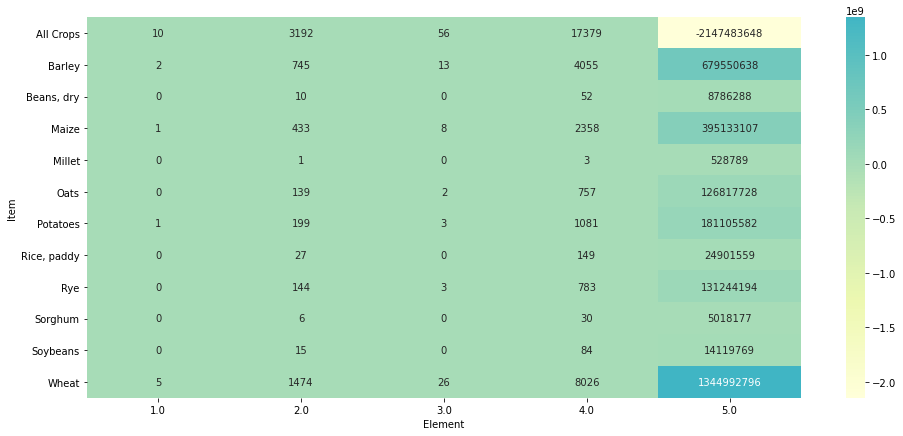

In [43]:
sns.heatmap(df_crosstab, annot=True, fmt="d",cmap="YlGnBu", cbar=True, center=df_crosstab.iloc[11, 4])
plt.show()

# FacetGrid, factorplot and lmplot

Seaborn's grid plots require data in "tidy format" (one observation per row of data), allow us to combine multiple smaller plots into a larger visualization that can help identify trends in data with many variables

**FacetGrid**
foundational for many data aware grids, it allows the user to control how data is distributed across columns, rows and hue
Once a  FacetGrid is created, the plot type must be mapped to the grid

**factorplot**
a simpler way to use a  FacetGrid for categorical data
Combines the facetting and mapping process into 1 function

**lmplot**
it plots scatter and regression plots on a FacetGrid

C:\Users\bea\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


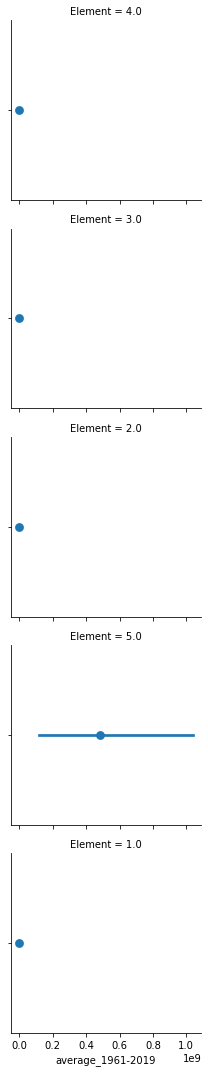

In [46]:
# categorical example of facetgrid
g2 = sns.FacetGrid(df3, 
             row="Element",
             row_order=[4.0, 3.0, 2.0, 5.0, 1.0])

# Map a pointplot onto the grid
g2.map(sns.pointplot, 'average_1961-2019')
plt.show()

In [121]:
# load and prepare data
df4 = pd.read_csv('../datasets/clean/all_data_crops.csv', index_col=0)
df4 = df4[df4.Area.isin(['Greece', 'Portugal', 'Belgium', 'Ireland'])]
df4.head()

,Area,Item,Element,Unit,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,yearly_average_1961-2019,std_1961-2019
2717,Belgium,"Almonds, with shell",Area harvested,ha,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.000000
2718,Belgium,"Almonds, with shell",Production,tonnes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.000000
2719,Belgium,Apples,Area harvested,ha,NaN,NaN,NaN,NaN,NaN,NaN,...,7100.0,7100.0,7100.0,6865.0,6491.0,6164.0,5990.0,5810.0,7644.80,1010.182141
2720,Belgium,Apples,Yield,hg/ha,NaN,NaN,NaN,NaN,NaN,NaN,...,310423.0,322394.0,448451.0,413999.0,367037.0,139903.0,386144.0,447229.0,390174.45,88237.907477
2721,Belgium,Apples,Production,tonnes,NaN,NaN,NaN,NaN,NaN,NaN,...,220400.0,228900.0,318400.0,284210.0,238244.0,86236.0,231300.0,259840.0,301566.75,89114.120934


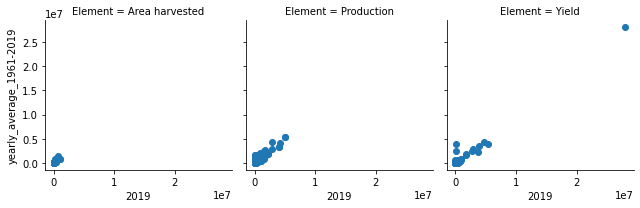

In [122]:
# example of standard maplotlib plot
g = sns.FacetGrid(df4, col="Element")
g.map(plt.scatter, '2019', 'yearly_average_1961-2019')
plt.show()

C:\Users\bea\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


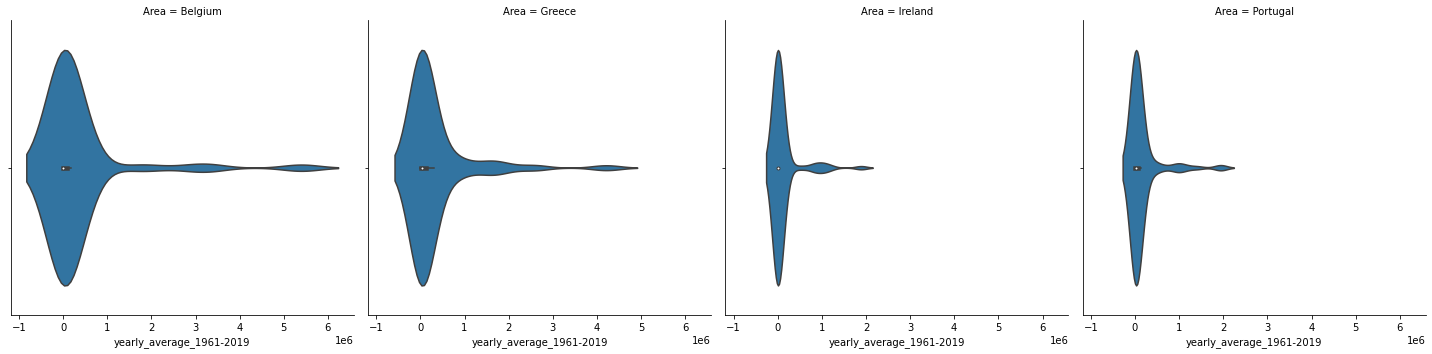

In [123]:
# factorplot
sns.factorplot(x="yearly_average_1961-2019", data=df4[df4.Element == 'Production'], col="Area", kind='violin')
plt.show()

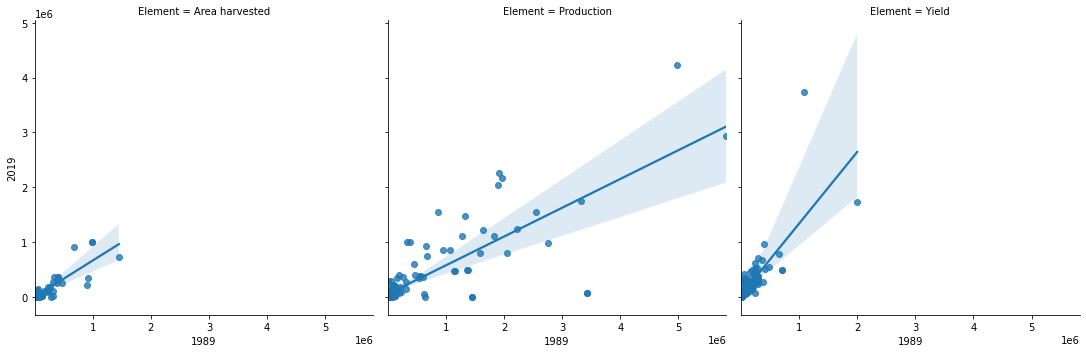

In [124]:
#lmplot
sns.lmplot(data=df4, y="2019", x="1989",
        col="Element")
plt.show()

# PairGrid and pairplot

unlike with the three previous, with these plots is that we only define the columns of data we want to compare.

**PairGrid**
hows pairwise relationships between data elements

**Pairplot**
is a shortcut for the  PairGrid

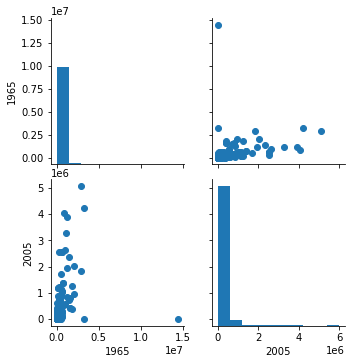

In [125]:
g = sns.PairGrid(df4, vars=["1965", "2005"])
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

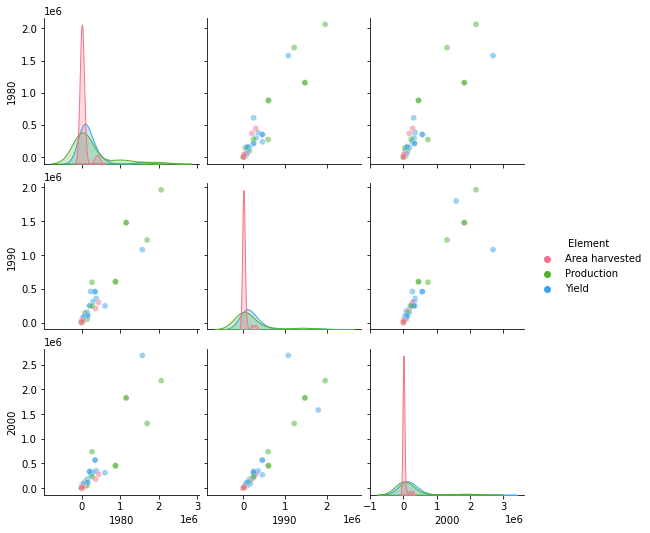

In [141]:
sns.pairplot(df4[df4.Area == 'Ireland'], vars=["1980", "1990", "2000"],
                hue='Element', palette='husl', plot_kws={'alpha': 0.5})
plt.show()

# JointGrid and jointplot

**JointGrid**
allows us to compare the distribution of data between two variables, making use of scatter plots, regression lines, as well as histograms, distribution plots, and kernel density estimates to give us insight into our data.
You must define the grid and map the plots onto the grid. 

**jointplot**
it is easier to use but provides fewer customization capabilities

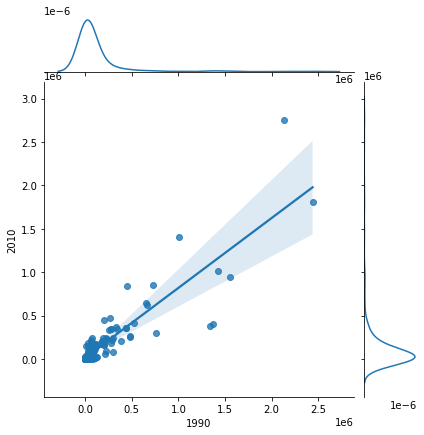

In [150]:
# basic
g = sns.JointGrid(data=df4[df4.Area == 'Portugal'], x="1990", y="2010")
g.plot(sns.regplot, sns.kdeplot)
plt.show()

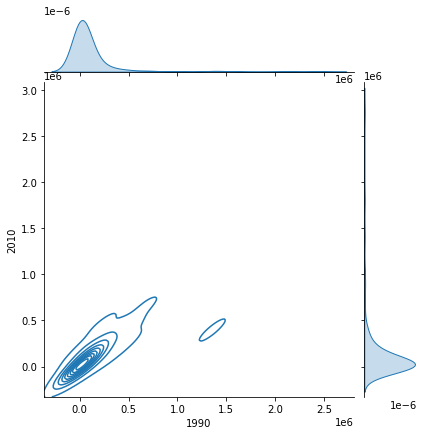

In [152]:
g = sns.JointGrid(data=df4[df4.Area == 'Portugal'],x="1990", y="2010")
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, shade=True)

<ipython-input-165-acad0d4b870f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.jointplot(data=df4[df4.Area == 'Ireland'][df4.Element == 'Production'],x="1965", y="1966", kind='hex')


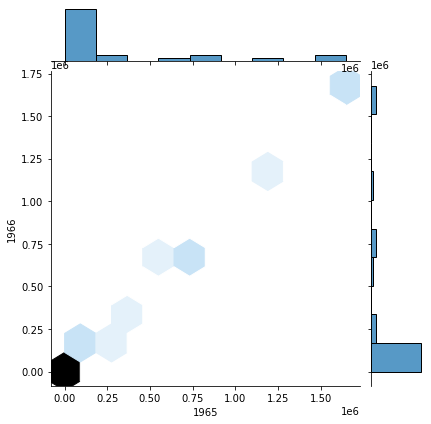

In [165]:
sns.jointplot(data=df4[df4.Area == 'Ireland'][df4.Element == 'Production'],x="1965", y="1966", kind='hex')
plt.show()